In [22]:
import crypy as cp
import matplotlib.pyplot as plt
import numpy as np
import importlib
importlib.reload(cp)

<module 'crypy' from 'd:\\github\\2H_TaSe2_Tc_STM\\crypy.py'>

Test

Previous

In [23]:
from imagingPhase import visPhase as vp
clrs = vp.DomainColoring._set_defualt_clrset()
CLR_FACE = clrs
CLR_EDGE = np.eye(3)
CLR_NODE = np.array([(255, 165, 0),(0, 127, 255)])/256

(-1.0, 1.0)

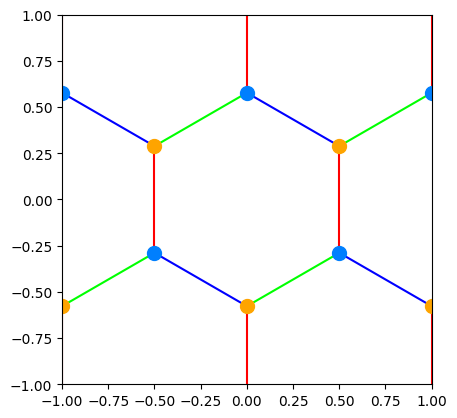

In [24]:
a1 = [1,0]
a2 = [-0.5,3**0.5/2]
pv_domain = cp.PrimitiveVector2D(a1,a2)
pv_subDomain = pv.get_sub_structure(3,3) # unitcell 안에서 새부적인 작업을 하기 위해 # unitcell 안에서 새부적인 작업을 하기 위해
bss_dwdv = cp.Basis2D(pv_subDomain)

gen_vor = lambda x,y,c : plt.plot(x,y,color=c,marker='o',linestyle='None',markersize=10)
gen_vor_A = lambda x,y: gen_vor(x,y,CLR_NODE[0,:])
gen_vor_C = lambda x,y: gen_vor(x,y,CLR_NODE[1,:])
gen_wall = lambda xx,yy,c: plt.plot(xx,yy,color=c)
gen_wall_r = lambda xx,yy: gen_wall(xx,yy,CLR_EDGE[0,:])
gen_wall_g = lambda xx,yy: gen_wall(xx,yy,CLR_EDGE[1,:])
gen_wall_b = lambda xx,yy: gen_wall(xx,yy,CLR_EDGE[2,:])

p1=(2,1)# vorA
p2=(1,2)# vorC
p3=(1,-1)
p4=(-1,1)

bss_dwdv.add_artist(gen_wall_r,(p1,p3),label='wall_r')
bss_dwdv.add_artist(gen_wall_g,(p2,p4),label='wall_g')
bss_dwdv.add_artist(gen_wall_b,(p1,p2),label='wall_b')
bss_dwdv.add_artist(gen_vor_A,(p1),label='vor_A')
bss_dwdv.add_artist(gen_vor_C,(p2),label='vor_C')

bss_domain = cp.Basis2D(pv2) # to draw face


lp = cp.LatticePoints2D(pv) 
lp.generate_points_by_xylim((-5,5),(-5,5))


cry = cp.Crystal2D(bss1,lp)
f,ax =cry.plot_crystal()    
ax.set_xlim(-1,1)
ax.set_ylim(-1,1) 







[[ 0.          3.          1.5        -1.5       ]
 [ 0.          0.          2.59807621  2.59807621]]
0.0 0.0
-0.5 0.8660254037844386
-1.0 1.7320508075688772
1.0 0.0
0.5 0.8660254037844386
0.0 1.7320508075688772
2.0 0.0
1.5 0.8660254037844386
1.0 1.7320508075688772


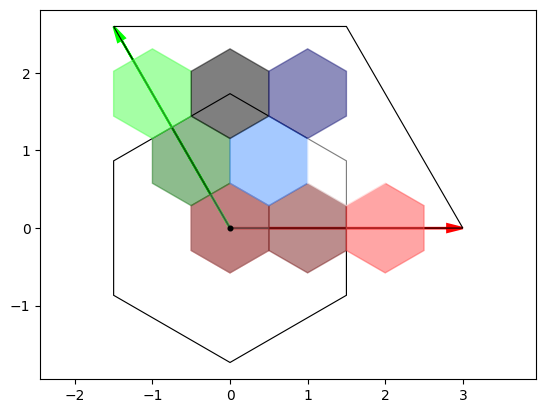

In [25]:

pv3 = pv.get_super_structure(3,3)
gen_hex = lambda x,y,c: cp.Collection.Generator.gen_hexagon(x=x,y=y,c=c,phi=np.pi/2,r=1/3**.5)
gen_hex(0,0,'r')
gen_hexs = []

def gen_hex_all(x,y,cla_all):
    for i in range(3):
        for j in range(3):
            x_cntr,y_cntr = pv.cal_xy_from_ij([i,j]).flatten()
            print(x_cntr,y_cntr)
            gen_hex_one = lambda x,y: gen_hex(x+x_cntr,y+y_cntr,cla_all[i,j,:])
            gen_hex_one(x,y)
pv3.plot_all()
gen_hex_all(0,0,CLR_FACE)
lp2 = cp.LatticePoints2D(pv3) 
lp2.generate_points_by_xylim((-5,5),(-5,5))        

(-1.0, 1.0)

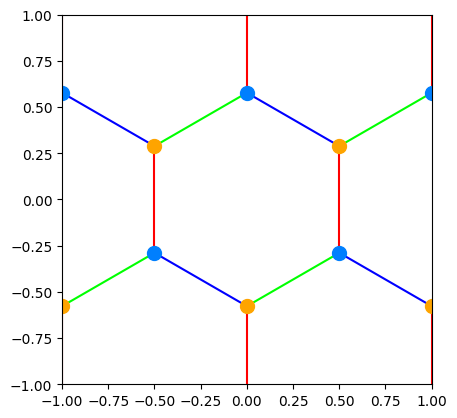

In [26]:
cry = cp.Crystal2D(bss1,lp)
cry2 = cp.Crystal2D(bss1,lp)
f,ax =cry.plot_crystal()    
ax.set_xlim(-1,1)
ax.set_ylim(-1,1) 

In [29]:
cp.TrackedInstance._all_instances[cp.PrimitiveVector2D]